<a href="https://colab.research.google.com/github/ShGamer16/PRO-112/blob/main/PRO_112.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clone the required dataset from given 

In [ ]:
#Cloning the required dataset
!git clone https://github.com/procodingclass/Pro-M3-Hurricane-Damage-Dataset

Cloning into 'Pro-M3-Hurricane-Damage-Dataset'...
remote: Enumerating objects: 800, done.
remote: Counting objects: 100% (800/800), done.
remote: Compressing objects: 100% (799/799), done.
remote: Total 800 (delta 0), reused 800 (delta 0), pack-reused 0
Receiving objects: 100% (800/800), 2.07 MiB | 12.40 MiB/s, done.


Display first image from training dataset

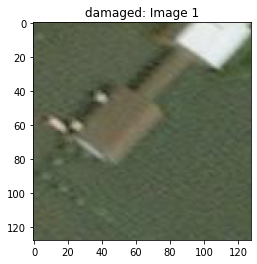

In [ ]:
#Display image
from matplotlib import pyplot
from matplotlib.image import imread

training_damaged_image = "/content/Pro-M3-Hurricane-Damage-Dataset/train/damage/image (1).jpeg"

# load image pixels
image = imread(training_damaged_image)

pyplot.title("damaged: Image 1")

# plot raw pixel data
pyplot.imshow(image)

# show the figure
pyplot.show()

Perform augmentation on Training dataset

In [ ]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

trainingdatagenerator = ImageDataGenerator(zoom_range = 0.3,
                                           horizontal_flip=True,
                                           fill_mode = 'nearest',)
training_image_directory = "/content/Pro-M3-Hurricane-Damage-Dataset/train"
training_augmented_images = trainingdatagenerator.flow_from_directory(training_image_directory,target_size = (180,180))

Found 300 images belonging to 2 classes.


Visualize the augmented images in four sub-plots

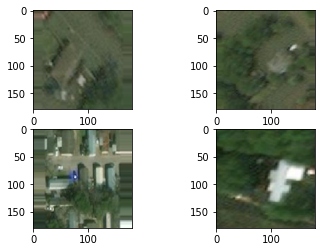

In [ ]:
from matplotlib import pyplot
from matplotlib.image import imread

for i in range(4):
  pyplot.subplot(2,2,i+1)
  batch = training_augmented_images.next()
  image = batch[0][0].astype('uint8')
  pyplot.imshow(image)
pyplot.show()

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',input_shape = (180,180,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512,activation = 'relu'),
    tf.keras.layers.Dense(2,activation = 'softmax'),
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 20, 128)      0